**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almacenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [26]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
#for local 
#import sys ; sys.path.append('../commons/utils/')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py --no-cache
from general import configure_lab4
configure_lab4()
from lab4 import *
GRADER = part_1()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--2021-08-27 11:59:58--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14633 (14K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  14.29K  --.-KB/s    in 0s      

2021-08-27 11:59:58 (39.9 MB/s) - ‘general.py’ saved [14633/14633]

lab configuration started
installing libraries
downloading files
lab configured


# Laboratorio 4 - Parte 1. Redes neuronales - perceptrón multicapa

Este ejercicio tiene como objetivo implementar una red neuronal artificial de tipo perceptrón multicapa (MLP) para resolver un problema de regresión. Usaremos la librería sklearn. Consulte todo lo relacionado con la definición de hiperparámetros, los métodos para el entrenamiento y la predicción de nuevas muestras en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

Para este ejercicio usaremos la base de datos sobre calidad del aire, que ha sido usada en laboratorios previos, pero en este caso trataremos de predecir dos variables en lugar de una, es decir, abordaremos **un problema de múltiples salidas**.

In [27]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

x = db[:,0:11]
y = db[:,11:13]

Para calcular los errores, vamos a explorar y usar el [modulo de metricas den sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

Podemos observar que el modulo tiene metricas para regresión y clasificación.

### Ejercicio 1 - Experimentar con MLP para regresión

Para porder implementar nuestra función, lo primero que debemos entender la estrucutra de la red. 

Como mencionamos, vamos a solucionar un problema de multiples salidas. Estas salidas con valores continuos. Por lo tanto debemos garantizar que la capa de salida de nuestra red tenga la capacidad de modelar. este tipo de datos.


In [28]:
#@title Pregunta Abierta
#@markdown ¿De acuerdo al problema planteado, que función de activación debe usar el MLP para un problema de regresión?
respuesta_1 = "No hay funci\xF3n de activaci\xF3n para problemas de regresi\xF3n, identity se refiere a la funci\xF3n lineal. " #@param {type:"string"}

Una caracteristica de los modelos de sklearn, es que ciertos tipos de atributos, solo pueden ser accedidos cuanto se entrena el modelo. Vamos a realizar un pequeña función para comprobar cual es la capa de activación de los modelos MLP para regresión de sklearn.

In [29]:
# ejercicio de código
def output_activation():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPRegressor()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp=mlp.fit(xrandom,yrandom)
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [30]:
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio1", output_activation)

TEST EXITOSO!


In [31]:
print("la función de activación para un problema de regresion es:", output_activation())

la función de activación para un problema de regresion es: identity


Una vez comprobado que sklearn usa la función de activación correcta, vamos crear la función para realizar los experimentos.

Vamos completar la función con el código necesario para usar una red neuronal tipo MLP para solucionar el problema de regresión propuesto.
1. Como función de activación en las capas ocultas use la función 'tanh'. 
2. Ajuste el número máximo de épocas a 400.
3. Dejamos como variables el número de capas ocultas y el número de neuronas por capa
5. debemos seleccionar la función adecuada del [modulo de sklearn para calcular el Error Porcentual Absoluto Medio (MAPE en sigla en ingles)](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics). Tener en cuenta que parametros usar.
6. Debemos usar los nombres explicitos, por ejemplo si para el MLP es necesario usar el parametro `activation`, debe ser llamado: `MLPRegressor(activation=...)`
7. Explorar que hace la siguiente linea de codigo `tuple(2*[100])`

**NOTA**: cuando observe el el parametro `random_state=1` por favor conservarlo, ya que esto hace que los resultados sean similares a lo largo de las ejecucciones.

In [33]:
# ejercicio de código

def experimetar_mlp(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 6 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba variable 1 y desviación estandar
        - promedio de error prueba variable 2 y desviación estandar
        
    """
    #Validamos el modelo
    Folds = 4
    ss = ShuffleSplit(n_splits=Folds, test_size=0.2, random_state=1)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(ss.split(X)):
                # para almacenar errores intermedios
                ErrorY1 = np.zeros(Folds)
                ErrorY2 = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train,:]
                Xtest = X[test,:]
                Ytest = Y[test,:]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                mlp = MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,activation = 'tanh',max_iter = 400,random_state=1)
                # entrena el MLP
                mlp=mlp.fit(X = Xtrain,y = Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                # Mida el MAPE para cada una de las dos salidas
                # Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                errors = mean_absolute_percentage_error(Ytest, Yest,multioutput='raw_values' )
                ErrorY1[j] = errors[0]
                ErrorY2[j] = errors[1]
        
            print('error para salida 1 = ' + str(np.mean(ErrorY1)) + '+-' + str(np.std(ErrorY1)))
            print('error para salida 2 = ' + str(np.mean(ErrorY2)) + '+-' + str(np.std(ErrorY2)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba y1(media)'] = np.mean(ErrorY1)
            resultados.loc[idx,'intervalo de confianza y1'] = np.std(ErrorY1)
            resultados.loc[idx,'error de prueba y2(media)'] = np.mean(ErrorY2)
            resultados.loc[idx,'intervalo de confianza y2'] = np.std(ErrorY2)
            idx+=1
    return (resultados)

In [34]:
## la funcion que prueba tu implementacion
# ignorar los prints
GRADER.run_test("ejercicio2", experimetar_mlp)

error para salida 1 = 0.14588214880228648+-0.25267529364288344
error para salida 2 = 0.2908381204403266+-0.5037464013804821
error para salida 1 = 0.14073549944794908+-0.2437610354724295
error para salida 2 = 0.1289062702875345+-0.2232722095522161
error para salida 1 = 0.13323398006880496+-0.23076802277378936
error para salida 2 = 0.14167019313602774+-0.24537997242969567
error para salida 1 = 0.1337494179278282+-0.2316607873337621
error para salida 2 = 0.2623610300509302+-0.4544226339743161
TEST EXITOSO!


In [35]:
# tarda unos minutos!!
resultados_mlpr = experimetar_mlp(x,y, [1,2], [8,12,16,20])

error para salida 1 = 0.03665966239902784+-0.06349639786343858
error para salida 2 = 1.689216181975149+-2.9258082521484723
error para salida 1 = 0.03210568153132468+-0.055608671623880106
error para salida 2 = 1.487732289951916+-2.5768279142575117
error para salida 1 = 0.023872517800482676+-0.041348413735028414
error para salida 2 = 0.7051795958124171+-1.2214068884079914
error para salida 1 = 0.022298461882528917+-0.03862206891117804
error para salida 2 = 0.6399644589326614+-1.1084509579096957
error para salida 1 = 0.028227432155778897+-0.04889134666101253
error para salida 2 = 0.9794605135899179+-1.696475373545245
error para salida 1 = 0.02653064873857627+-0.045952431572977244
error para salida 2 = 1.3600603499751909+-2.3556936275169393
error para salida 1 = 0.021953640449485973+-0.038024820669608946
error para salida 2 = 0.6730416651782389+-1.1657423596994705
error para salida 1 = 0.018127460598292074+-0.03139768276844479
error para salida 2 = 0.47242750948723383+-0.8182684493251168


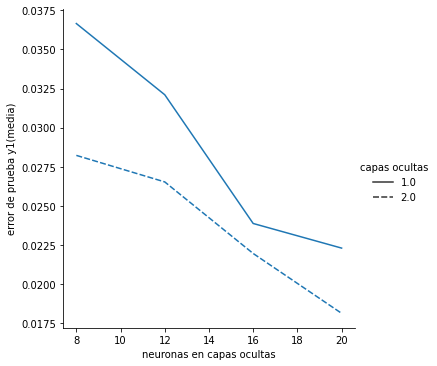

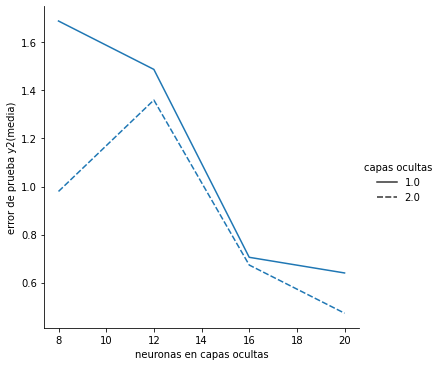

In [36]:
# ver los resultados.
import seaborn as sns
sns.relplot(data = resultados_mlpr,  x='neuronas en capas ocultas', y = 'error de prueba y1(media)', style= 'capas ocultas', kind = 'line')
sns.relplot(data = resultados_mlpr,  x='neuronas en capas ocultas', y = 'error de prueba y2(media)', style= 'capas ocultas', kind = 'line')

In [37]:
#@title Pregunta Abierta
#@markdown  ¿como influencian los parametros de numero de capas y el numero de neuronas? explique de acuerdo a los resultados, recuerde concentrarse en los patrones no en valores especificos
respuesta_2 = "El n\xFAmero de capas y el n\xFAmero de neuronas en las capas ocultas son hiperpar\xE1metros del modelo que hay que ajustar, como se muestra en la gr\xE1fica entre mayor estos n\xFAmeros, mejor es el modelo ya que tiene menos error, decae. Pero como cualquier hiperpar\xE1metro de modelos es importante darle valores que permiten un mejor modelo y que no lo lleven a sobreajuste. " #@param {type:"string"}

### Ejercicio 2 Experimentar con MLP para clasificación

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [38]:
digits = load_digits(n_class=4)
#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
#---------- Datos a usar ----------------------
Xd = data
Yd = digits.target

In [39]:
#@title Pregunta Abierta
#@markdown  ¿Qué tipo de función de activación usa el modelo en la capa de salida para un problema de clasificación? 
respuesta_3 = "La funci\xF3n de activaci\xF3n es la funci\xF3n sigmoidal." #@param {type:"string"}

como lo hicmos antes, vamos a comprobar con la libreria la función de activación

In [40]:
# ejercicio de código
def output_activation_MPC():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPClassifier()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom,yrandom )
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [41]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio3", output_activation_MPC)

TEST EXITOSO!


In [42]:
print("la función de activación para un problema de clasificación es:", output_activation_MPC())

la función de activación para un problema de clasificación es: logistic


Ahora en nuestro siguiente ejercicio vamos a implementar una red neuronal artificial de tipo perceptrón multicapa (MLP) para resolver un problema de clasificación. Usaremos la librería sklearn. Consulte todo lo relacionado con la definición de hiperparámetros, los métodos para el entrenamiento y la predicción de nuevas muestras en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


Vamos completar la función con el código necesario para usar una red neuronal tipo MLP para solucionar el problema de clasificación propuesto.
1. Como función de activación en las capas ocultas use la función tangencial hiperbólica. 
2. Ajuste el número máximo de épocas a 400.
3. Dejamos como variables el número de capas ocultas y el número de neuronas por capa
5. Selecciones la función adecuada del [modulo de sklearn para calcular la exactitud del clasificador](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics). Tener en cuenta que parametros usar.
6. Debemos usar los nombres explicitos, por ejemplo si para el MLP es necesario usar el parametro `activation`, debe ser llamado: `MLPClassifier(activation=...)`

**NOTA**: cuando observe el el parametro `random_state=1` por favor conservarlo, ya que esto hace que los resultados sean similares a lo largo de las ejecucciones.

In [43]:
# ejercicio de código
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar        
    """
    #Validamos el modelo
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds) 
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,activation = 'tanh',max_iter = 400, random_state = 1)
                # entrenar el MLP
                mlp.fit(X = Xtrain,y = Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                Error[j] = accuracy_score(Ytest, Yest)
        
            print('error para configuracion de params = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba(media)'] = np.mean(Error)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Error)
            idx+=1
    return (resultados)

In [44]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio4", experimetar_mlpc)

error para configuracion de params = 0.10714285714285714+-0.18557687223952254
error para configuracion de params = 0.17857142857142858+-0.30929478706587094
error para configuracion de params = 0.14285714285714285+-0.24743582965269675
error para configuracion de params = 0.10714285714285714+-0.18557687223952254
TEST EXITOSO!


In [45]:
# tarda unos minutos!!
resultados_mlpc = experimetar_mlpc(Xd,Yd, [1,2], [12,16,20,24])

error para configuracion de params = 0.23333333333333334+-0.40414518843273806
error para configuracion de params = 0.22916666666666666+-0.39692831006786766
error para configuracion de params = 0.2263888888888889+-0.39211705782462086
error para configuracion de params = 0.2361111111111111+-0.4089564406759849
error para configuracion de params = 0.22361111111111112+-0.38730580558137395
error para configuracion de params = 0.23194444444444445+-0.40173956231111463
error para configuracion de params = 0.2263888888888889+-0.39211705782462086
error para configuracion de params = 0.23472222222222222+-0.40655081455436143


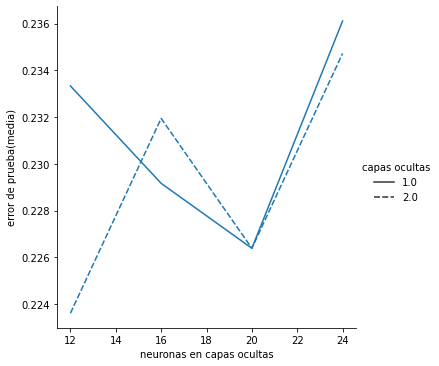

In [46]:
# ver los resultados
# notar como las capas ocultas y el # de neuronas influyen
import seaborn as sns
sns.relplot(data = resultados_mlpc,  x='neuronas en capas ocultas', y = 'error de prueba(media)', style= 'capas ocultas', kind = 'line')

In [47]:
#@title Pregunta Abierta
#@markdown ¿Cuántas neuronas en la capa de salida tiene el modelo? ¿Porqué debe tener ese número?
respuesta_4 = "Como el problema de d\xEDgitos escritos a mano se escogieron 4 clases, entonces el n\xFAmero de neuronas en la capa salida es 4." #@param {type:"string"}

**nota rapida** En la practica sklearn no es una la libreria indicada para desarollar redes neuronales, para practicas mas avanzadas y realizar modelos en el "mundo real" [se deben usar conceptos de deep learning y una libreria llamada Keras](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb).

In [48]:
GRADER.check_tests()

Todo se ve ok. Asegurate de responder las preguntas abiertas y envia le archivo al formulario ¡buen trabajo!


In [49]:
#@title Integrantes
codigo_integrante_1 ='1000415078' #@param {type:"string"}
codigo_integrante_2 = '1035833769'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo de los profesores


In [ ]:
GRADER.grade()